# Computer vision - Detección de esquinas (solución)

En este ejercicio aprenderemos a trabjar con imágenes utilizando la [librería OpenCV](http://opencv.org/). El mismo está divido en las siguientes partes:
1. Pantalla verde
2. Transformaciones geométricas
3. Filtros
4. Bordes
5. Hough
6. **Detección de esquinas**

## Resumen
En esta parte del ejercicio aplicaremos el detector de esquinas Harris sobre una imagen de un tablero de ajedréz.

Seguiremos los siguientes pasos:
1. Cargar imagen
2. Encontrar esquinas
3. Dibujar esquinas

## 1 - Cargar imagen

Importamos las librerías necesarias y cargamos la imagen con la que trabajaremos.

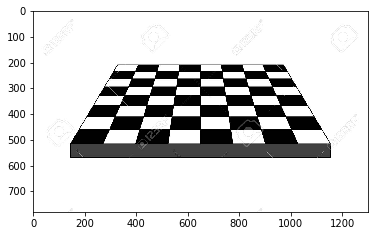

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('photos/board.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## 2 - Encontrar esquinas
Para trabajar con Harris primero convertiremos la imagen a blanco y negro. Luego aplicaremos Harris con los parámetros que creamos necesarios.

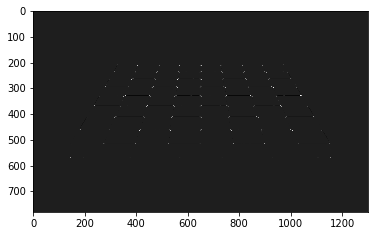

In [2]:
# Convierto la imagen a blanco y negro
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

#Detectar esquinas
window_size = 2 #2x2 pixel square
sobel_size = 3  #Tamaño del filtro Sobel
corner_threshold = 0.04
dst = cv2.cornerHarris(gray,window_size, sobel_size,corner_threshold)

#Dilatar corners
dst = cv2.dilate(dst,None)
plt.imshow(dst,cmap='gray')

## 3 - Dibujar esquinas
Ahora superpondremos las esquinas detectadas en la imagen original.

In [3]:
#Extraigo esquinas más marcadas
thresh = 0.01*dst.max()
corner_image = np.copy(image)

Iterar sobre la matriz dst y dibujar las esquinas cuya intensidad supere el umbral definido en la variable tresh. Utilizar la [función circle de OpenCV](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=circle#cv2.circle) para hacerlo.

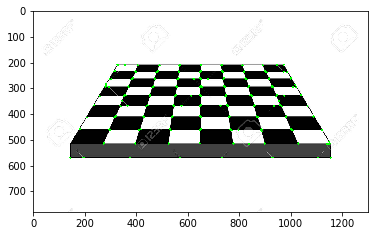

In [4]:
### SOLUCIÓN
for j in range(0,dst.shape[0]):
    for i in range(0,dst.shape[1]):
        if(dst[j,i] > thresh):
            cv2.circle(corner_image,(i,j),2,(0,255,0),1)
            
plt.imshow(corner_image)